In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("terrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


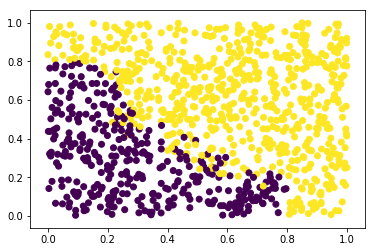

In [4]:
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])

In [5]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
clf=KNeighborsClassifier(n_neighbors=5)

In [8]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
clf.predict([[0.4,0.6]])

array([1.])

In [10]:
# We can make a 2d representation
# For this we create a mesh and we predict for each point in the mesh

In [11]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


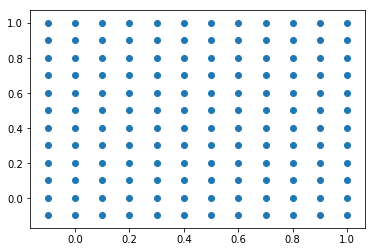

In [12]:
plt.scatter(xx,yy)

In [13]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



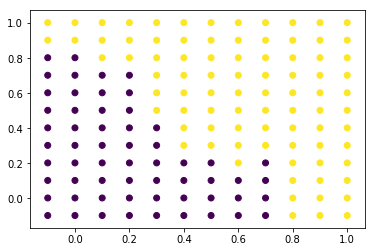

In [14]:
plt.scatter(xx,yy,c=Z)

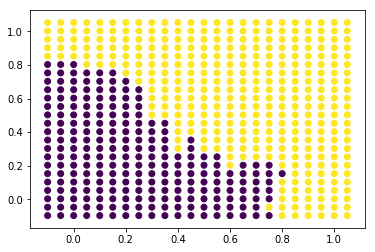

In [15]:
h = .05
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx,yy,c=Z)

In [16]:
# And now we reduce the size of the grid for higher resolution

In [17]:
from ipywidgets import interact

In [18]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

@interact(k=5)
def show(k):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.scatter(xx,yy,c=Z)
    plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow");

interactive(children=(IntSlider(value=5, description='k', max=15, min=-5), Output()), _dom_classes=('widget-interact',))

In [19]:
## Check out the overfitting !!

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [21]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,clf.predict(X_test))

0.9272727272727272

In [24]:
from sklearn.model_selection import cross_val_score

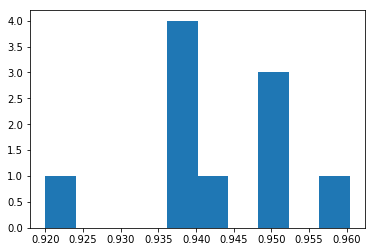

In [25]:
s=cross_val_score(clf,X,y,cv=10,scoring="accuracy")
plt.hist(s);

In [26]:
@interact(k=5)
def show(k):
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    print(cross_val_score(clf,X,y,cv=10,scoring="accuracy").mean())

interactive(children=(IntSlider(value=5, description='k', max=15, min=-5), Output()), _dom_classes=('widget-interact',))

In [27]:
# Grid Search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
clf2=GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
                  param_grid={"n_neighbors":np.arange(1,50)},)

In [30]:
clf2.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
clf2.best_params_

{'n_neighbors': 18}